In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import random
import math
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [2]:
WorldCasedf = pd.read_csv('covid19_confirmed_global.csv');
popDesdf = pd.read_csv('API_EN.POP.DNST.csv')
USCasedf = pd.read_csv('time_series_covid19_confirmed_US.csv')
StateDesdf = pd.read_csv('Population Density for state:province.csv')

In [3]:
print(WorldCasedf.columns[:3])
print(popDesdf.columns)
print(StateDesdf.columns)

Index(['Province/State', 'Country/Region', 'Lat'], dtype='object')
Index(['Country Name', '2018'], dtype='object')
Index(['Country Name', '2018'], dtype='object')


In [4]:
for ind in WorldCasedf.index:
    
    if (isinstance(WorldCasedf.loc[ind,'4/22/20'],type(100))):
        if(WorldCasedf.loc[ind,'4/22/20']<3):
            WorldCasedf = WorldCasedf.drop([ind])
    continue
        

In [5]:
def changeDf(df,popDesdf,Region,State):
    
    df['Population Density'] = np.zeros(df.shape[0])
    df = df[['Population Density'] + df.columns[:-1].tolist()]
    ### add Population Density for DF
    for ind in df.index:
        
        countryNow = df.loc[ind,Region]
        StateNow = df.loc[ind,State]
        if (not(pd.isna(StateNow))):
            
            if (not(StateDesdf.loc[StateDesdf["Country Name"] == StateNow,'2018'].empty)):

                df.at[ind,'Population Density']= StateDesdf.loc[StateDesdf["Country Name"] == StateNow,'2018']
                df.at[ind,Region] = df.loc[ind,'Province/State']
                continue
            
                
            
        if (popDesdf.loc[popDesdf["Country Name"] == countryNow,'2018'].empty):
            df = df.drop([ind])
            continue
        df.at[ind,'Population Density']= popDesdf.loc[popDesdf["Country Name"] == countryNow,'2018']
        
        
        
       
            
        
       
           
    df = df.set_index(Region)
    return df
        





In [6]:
WorldCasedf = changeDf(WorldCasedf,popDesdf,'Country/Region','Province/State')

WorldCasedf = WorldCasedf.drop(['Province/State'],axis = 1)


In [7]:
WorldCasedf.head()
WorldCasedf.loc['Ontario',:]

Population Density       14.8000
Lat                      51.2538
Long                    -85.3232
1/22/20                   0.0000
1/23/20                   0.0000
                         ...    
4/18/20               11013.0000
4/19/20               11561.0000
4/20/20               12063.0000
4/21/20               12715.0000
4/22/20               13718.0000
Name: Ontario, Length: 95, dtype: float64

In [8]:
def ChangeUSdf(USdf):
    loc = ""
    re_index = -1;
    returndf = pd.DataFrame(columns=USdf.columns);
    long = 0
    lati = 0
    numofcity = 1
    
    for ind in USdf.index:
        if (loc is USdf.loc[ind,'Province_State']):
           
            currentAdd = USdf.iloc[ind,:]
            numofcity+=1
            long += USdf.loc[ind,'Long_']
            lati += USdf.loc[ind,'Lat']
           
            for column in range(11,returndf.shape[1]):
                returndf.iat[re_index,column] = returndf.iloc[re_index,column] + currentAdd.iloc[column]
            continue
        re_index += 1;
        if (re_index > 0):
            returndf.iat[re_index-1,9] = long/numofcity
            returndf.iat[re_index-1,8] = lati/numofcity
        
        loc = USdf.loc[ind,'Province_State']
       
        lati = USdf.loc[ind,'Lat'] 
        long = USdf.loc[ind,'Long_'] 
        numofcity = 1
        returndf = returndf.append(USdf.iloc[ind,:])
    returndf.iat[re_index-1,9] = long/numofcity
    returndf.iat[re_index-1,8] = lati/numofcity
    returndf['Population Density'] = np.zeros(returndf.shape[0])
    
    returndf = returndf.reindex()
   
    for i in returndf.index:
        loc = returndf.loc[i,"Province_State"]
        
        if((StateDesdf.loc[StateDesdf["Country Name"] == loc,'2018'].empty)):
            returndf = returndf.drop([i])
            continue
        
        returndf.at[i,'Population Density']= StateDesdf.loc[StateDesdf["Country Name"] == loc,'2018']
        

        
        
                
        
        
    
    returndf = returndf.iloc[:,6:]
    
   
    returndf = returndf[['Population Density'] + returndf.columns[:-1].tolist()] 
    returndf = returndf.drop(['Country_Region'],axis = 1)
    returndf = returndf.drop(['Combined_Key'],axis = 1)
    
      
    returndf = returndf.set_index('Province_State')
    
    return returndf

In [9]:
USCasedf = ChangeUSdf(USCasedf)

In [10]:
USCasedf = USCasedf.drop(['4/23/20'],axis = 1)


In [11]:
# USCasedf = USCasedf.rename(columns = WorldCasedf.columns)
WorldCasedf.append(USCasedf)
WorldCol = WorldCasedf.columns
WorldCasedf.columns = range(95)
USCasedf.columns = range(95)
new = WorldCasedf.append(USCasedf)
new.columns = WorldCol
WorldCasedf = new
for x in new.loc['Ontario',:]:
    print(x)

14.8
51.2538
-85.3232
0
0
0
0
1
1
1
1
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
6
6
11
15
18
20
20
22
25
28
29
34
36
41
42
74
79
104
177
185
221
257
308
377
425
503
588
688
858
994
1144
1355
1706
1966
2392
2793
3255
3630
4354
4347
4726
5276
5759
6237
6648
7049
7470
7953
8447
9840
10456
11013
11561
12063
12715
13718


/Users/jiayingcui/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


## Adding the Row of Waterloo and Delete the unimportant ones

In [12]:
### ADDING THE ROW OF WATERLOO

waterloodata = [1,4,8,9,11,12,15,17,22,33,48,58,60,70,81,88,102,108,118,129,148,
               157,158,172,185,207,220,237,242,261,274,327,353,379,383,399,474,
               487,503,528]
start = [480.1,43.4643,-80.5204]
zeros = [0]*52
Waterloo_row = start+zeros+waterloodata
	
# Pass a series in append() to append a row in dataframe  
WorldCasedf = WorldCasedf.append(pd.Series(Waterloo_row, index=WorldCasedf.columns,name = 'Waterloo' ),ignore_index=False)


In [13]:
from sklearn.utils import shuffle
WorldCasedf = shuffle(WorldCasedf)


In [14]:
WorldCasedf = WorldCasedf.dropna()


### Handling Testing Cases and Training Cases

In [15]:
WorldCasedf.shape

(284, 95)

In [16]:
def makeInput(df,x):
    returndf = df.iloc[:,0:60].copy()
    i = 1;
    while (i !=x):
        newdf = df.iloc[:,np.r_[0:3,3+i:60+i]]
        newdf.columns = returndf.columns
        returndf = returndf.append(newdf)
        i += 1
    return returndf


In [17]:
num_of_train = WorldCasedf.shape[1]-5-60-1

Train_df = makeInput(WorldCasedf,num_of_train)
Test_Casedf = WorldCasedf.iloc[:,np.r_[0:3,34:95]]

Train_df = makeInput(WorldCasedf,num_of_train)

Test_df = makeInput(Test_Casedf,5)
Train_x = Train_df.iloc[:,:-1]
Train_y = Train_df.iloc[:,-1]
Test_x = Test_df.iloc[:,:-1]
Test_y = Test_df.iloc[:,-1]

## Start Predicting

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
### not svc,GaussianNB 


In [19]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor()

regr_1.fit(Train_x, Train_y)
print(mean_absolute_error(Test_y, regr_1.predict(Test_x)))
print(r2_score(Test_y, regr_1.predict(Test_x)))


436.19795134443024
0.9888348077888632


In [20]:
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor()
MLP.fit(Train_x, Train_y)
mean_absolute_error(Test_y, MLP.predict(Test_x))
print(mean_absolute_error(Test_y, MLP.predict(Test_x)))
print(r2_score(Test_y, MLP.predict(Test_x)))



195.41457662143512
0.9988504968329827


In [21]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(7, weights='distance')
knn.fit(Train_x, Train_y)
mean_absolute_error(Test_y, knn.predict(Test_x).astype(int))
print(mean_absolute_error(Test_y, knn.predict(Test_x)))
print(r2_score(Test_y, knn.predict(Test_x)))

883.9753221530952
0.9621795257590702


## Predict Use Decision Tree

In [25]:
def DTOnestep(df,i):
    
    Pred_Casedf = df.iloc[:,np.r_[0:3,39+i:df.shape[1]]]
    return regr_1.predict(Pred_Casedf).astype(int)

    
def NextDate(month,date,year):  
    if (month in [1,3,5,7,8,9,10]):
        if (date == 31):
            return [month+1,1,year]
    if (month in [4,6,9,11]):
        if (date == 30):
            return [month+1,1,year]
    if (month == 12):
        if (date == 31):
            return [1,1,year + 1]
    if (month == 2):
        if (date == 28):
            return [3,1,year]
    return[month,date+1,year]
            




In [26]:
def Predict(WorldCasedf):
    currentDate = [4,22,19]
    for i in range(100):
        currentDate = NextDate(currentDate[0],currentDate[1],currentDate[2])
        col_name = str(currentDate[0])+"/"+str(currentDate[1])+"/"+str(currentDate[2])
        WorldCasedf[col_name] = DTOnestep(WorldCasedf,i)
    return WorldCasedf

In [27]:
Prediction = Predict(WorldCasedf)

In [28]:
WorldCasedf.loc['New York',:][90:100]

4/18/20    241712
4/19/20    247815
4/20/20    253060
4/21/20    258361
4/22/20    263292
4/23/19    214454
4/24/19    214454
4/25/19    214454
4/26/19    214454
4/27/19    214454
Name: New York, dtype: object

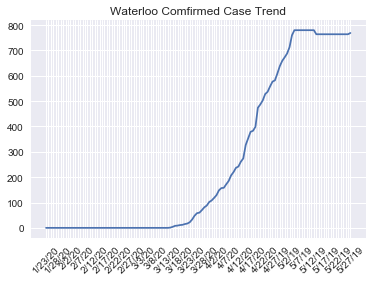

In [29]:
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker
fig, ax = plt.subplots()
ax.plot(Prediction.loc['Waterloo',:][4:130])

plt.title("Waterloo Comfirmed Case Trend")
plt.xticks(Prediction.columns[4:130],rotation=45)
i = 0
for label in ax.get_xticklabels():
    if (i%5 == 0):
        i += 1
        continue
    label.set_visible(False)
    i += 1


plt.show()

In [30]:
confirm_Waterloo = Prediction.loc['Waterloo',:][4:130]
New_Case = []
last = 0
for i in range(confirm_Waterloo.shape[0]):
    more = confirm_Waterloo.iloc[i] - last
    last = confirm_Waterloo.iloc[i]
    New_Case.append(more)
    
   

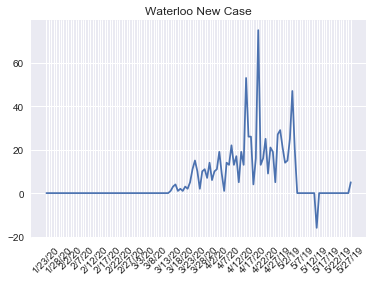

In [31]:
New_Casedf = pd.DataFrame(New_Case) 

fig, ax = plt.subplots()


dfObj = pd.DataFrame(New_Case)
dfObj.index= Prediction.columns[4:130]
ax.plot(dfObj)

plt.title("Waterloo New Case")
plt.xticks(rotation=45)
i = 0
for label in ax.get_xticklabels():
    if (i%5 == 0):
        i += 1
        continue
    label.set_visible(False)
    i += 1


plt.show()

In [32]:
Starting = Prediction.loc['Ontario',:]
for i in ['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 'Newfoundland' ,'Labrador',
          'Nova Scotia', 'Prince Edward Island', 'Quebec',
          'Saskatchewan', 'Northwest Territories', 'Nunavut','Yukon']:
    if (i in Prediction.index):
        current_Row = Prediction.loc[i,:]
   
        for x in range(Starting.shape[0]):
            Starting.iat[x] = current_Row[x] + Starting[x]
        
    

In [33]:
US_Starting = Prediction.loc["New York",:]
for i in ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]:
    if (i in Prediction.index):
        current_Row = Prediction.loc[i,:]
        if (current_Row.shape[0] == 2):
            continue;
        
        
        for x in range(US_Starting.shape[0]):
            US_Starting.iat[x] = current_Row[x] + US_Starting[x]
     

In [34]:
American = Prediction.loc['New York',:]
American

Population Density      419.3
Lat                   42.5442
Long                 -75.4742
1/22/20                     0
1/23/20                     0
                       ...   
7/27/19                214454
7/28/19                214454
7/29/19                214454
7/30/19                214454
7/31/19                214454
Name: New York, Length: 195, dtype: object

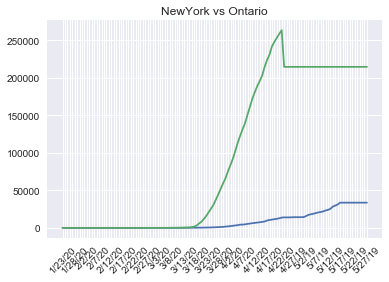

In [35]:
fig, ax = plt.subplots()
ax.plot(Prediction.loc['Ontario',:][4:130])
ax.plot(Prediction.loc['New York',:][4:130])

plt.title("NewYork vs Ontario")
plt.xticks(Prediction.columns[4:130],rotation=45)
i = 0
for label in ax.get_xticklabels():
    if (i%5 == 0):
        i += 1
        continue
    label.set_visible(False)
    i += 1


plt.show()

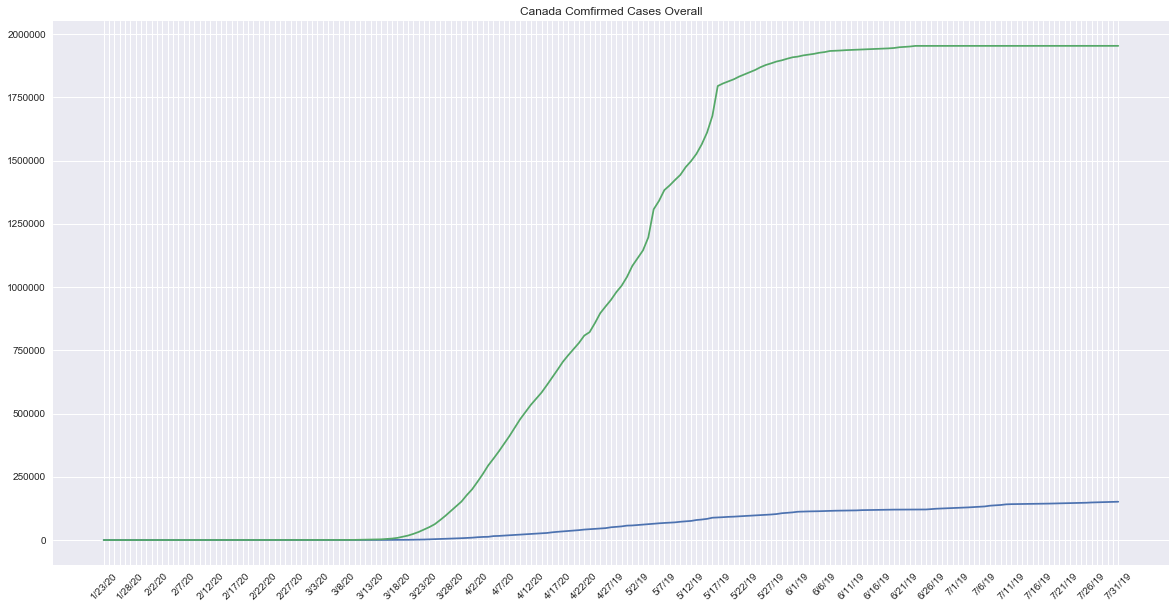

In [36]:


fig, ax = plt.subplots(figsize=(20, 10))



ax.plot(Starting[4:])
ax.plot(US_Starting[4:])


plt.title("Canada Comfirmed Cases Overall")
plt.xticks(rotation=45)
i = 0
for label in ax.get_xticklabels():
    if (i%5 == 0):
        i += 1
        continue
    label.set_visible(False)
    i += 1


plt.show()